##### 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### 2. Load the train and test datasets into pandas dataframe

In [2]:
train = pd.read_csv('dataset/titanic_train.csv')

In [3]:
# display 5 first rows
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# set the index of PassengerId
train = train.set_index('PassengerId')

In [5]:
# load test dataset
test = pd.read_csv('dataset/titanic_test.csv')

In [6]:
# display 5 first rows
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 3. Visually inspect the head of the dataset

In [7]:
# view shape of dataset
train.shape

(891, 11)

In [8]:
# Check out the data summary
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# identify datatypes 
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [10]:
# identify missing values
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [11]:
# Identify number of unique values
datadict['NUnique'] = train.nunique()
datadict

,0,MissingVal,NUnique
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [12]:
# Identify the count for each variable
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [13]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


##### 4.Run discriptive statistics of object and numerical datatypes

In [14]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# multivariate analysis of titanic dataset
# find Survived and not Survived
# train.head()
train.Survived.value_counts(normalize=True)
# only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

##### 5. Visualize the data with Seaborn

C:\Users\samit\AppData\Local\Temp\ipykernel_8500\4100986936.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
C:\Users\samit\AppData\Local\Temp\ipykernel_8500\4100986936.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=True,ax=

<Axes: xlabel='Age', ylabel='Density'>

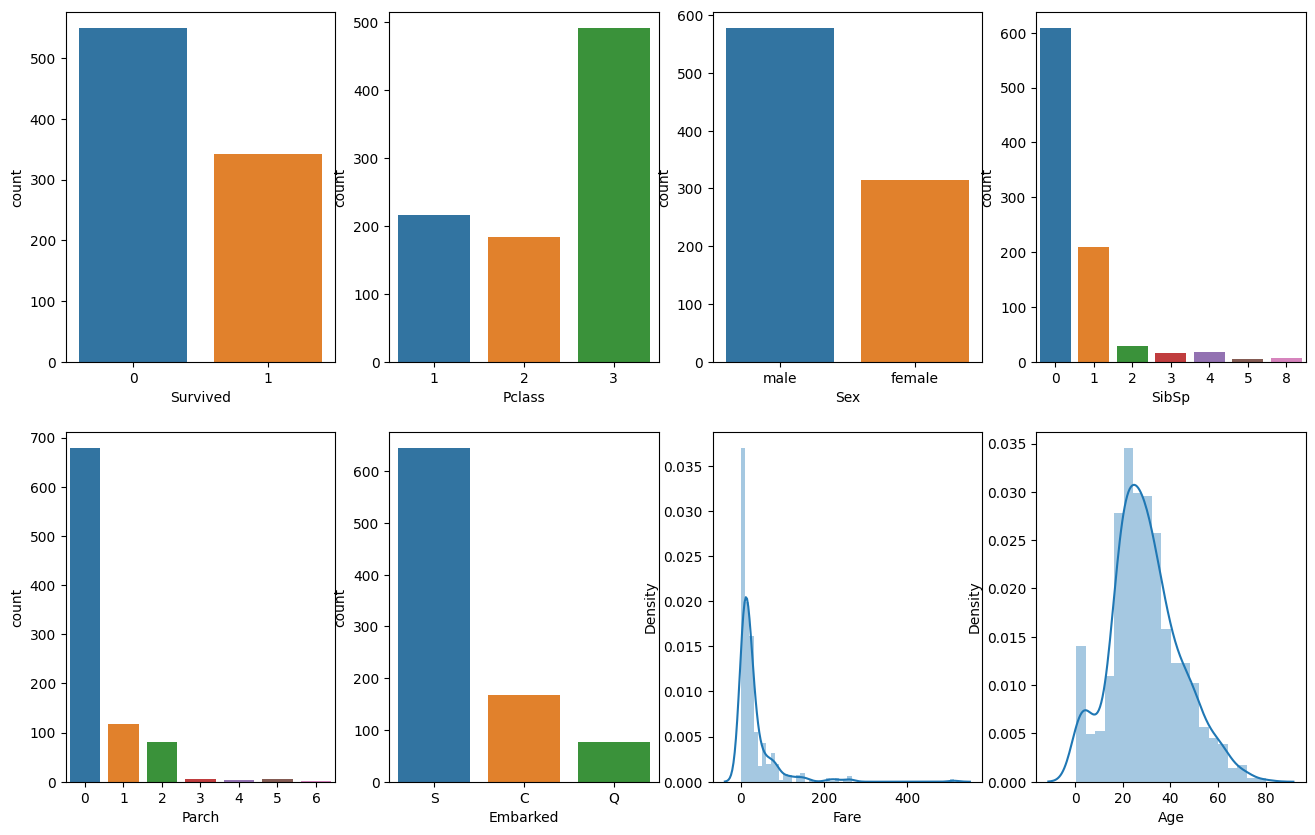

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived',data=train,ax=axes[0,0])
sns.countplot(x='Pclass',data=train,ax=axes[0,1])
sns.countplot(x='Sex',data=train,ax=axes[0,2])
sns.countplot(x='SibSp',data=train,ax=axes[0,3])
sns.countplot(x='Parch',data=train,ax=axes[1,0])
sns.countplot(x='Embarked',data=train,ax=axes[1,1])
sns.histplot(train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

In [ ]:
# Multivariate EDA
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr() # correlation matrix
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

# There is a negative coorelation between Fare and Pclass, Age and Plcass

##### 6. Feature Engineering Data- Extract title from name, Extract new features from the other features

In [ ]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)', expand=False)

# Check the result
train.title.value_counts().reset_index()